## Sumário

1. Fototriangulação pelo método dos feixes perspectivos (bundle adjustment) - Visão geral e planejamento

2. Formulação do Bundle Adjustment

## 1. Fototriangulação pelo método dos feixes perspectivos (bundle adjustment)

"Geração de um modelo fotogramétrico único ao <b>ajustar simultaneamente os parâmetros da orientação exterior das imagens e as coordenadas dos pontos no espaço</b>, garantindo maior precisão na reconstrução tridimensional." (Coelho, 2007)

"Objetiva determinar as coordenadas 3D de pontos no terreno a partir de várias fotografias ao <b>refinar simultaneamente as coordenadas 3D que descrevem a geometria da cena, bem como os parâmetros do movimento relativo e as características ópticas da(s) câmera(s) empregada(s)</b> para adquirir as imagens, de acordo com um critério de otimização envolvendo as projeções de imagem correspondentes de todos os pontos." ([scipy-cookbook](https://scipy-cookbook.readthedocs.io/items/bundle_adjustment.html), 2015)

Ou seja, ajustar simultananeamente a matriz de parâmetros íntrínsecos $K$, as matrizes de parâmetros extrínscos das $n$ câmeras $T_n$ e os $j$ pontos no espaço-objeto $[X_j, Y_j, Z_j]$, 

> **_NOTA:_**  A arte de usar o <i>bundle-adjustment</i> para predizer a movimentação da câmera ao longo de sua gravação é chamada <i>Visual Self Localization and Mapping</i> VSLAM

## 2. Formulação do Bundle Adjustment

Os principais elementos envolvidos no bundle adjustment são:

- $\Theta = [P_1,...,P_N,X_1,...,X_M]$ que minimize a função de custo:
    -  $\mathcal{L}(\Theta) = \sum_{i=1}^M\sum_{j=1}^N \mathcal{X_{ij}}|| \mathbf{u_{ij}} - P_i \mathbf{X_j}||^2 = min$
- Conjunto de pontos fotogramétricos no espaço-objeto $\mathbf{X_j} \ (X_{j}, Y_{j}, Z_{j})$ para $j=1,...,M$ a serem ajustados;
- Conjunto de matrizes de projeção espaço-objeto para espaço imagem $P_i = K_iT_i$ para $i=1,...,N$ onde
    - $K_i$ e $T_i$ são as respectivas matrizes de parâmetros intrísecos e extrínsecos a serem ajustados;
    - Caso a distância focal esteja automática, ou seja, variando, um conjunto de matrizes íntrínsecas $K_i$ a serem ajustadas, caso a distância focal esteja fixa, apenas uma matriz íntrínseca $K$ a ser ajustada;
- Conhecidos os pontos de controle no espaço-objeto $\mathbf{X_k} \ (X_{k}, Y_{k}, Z_{k})$ para $k=M+1,...,O$ ;
- Conhecidos os pontos no espaço-imagem $\mathbf{u_{ij}}\ ( u_{ij},v_{ij})$ correspondentes a coordenada observada do ponto 3D fotogramétrico $j$ na imagem $i$;
- Conhecidos os pontos no espaço-imagem $\mathbf{u_{ik}}\ ( u_{ik},v_{ik})$ correspondentes a coordenada observada do ponto 3D de controle $k$ na imagem $i$;
- $P_i\mathbf{X_j}$ é a reprojecção do ponto 3D $j$ na imagem $i$;
- $\mathbf{u_{ij}} - P_i\mathbf{X_j}$ é o vetor de resíduos;
- $\mathcal{X_{ij}}$ e $\mathcal{X_{ik}} = 1 $ se o ponto 3D é visto na imagem $i$ e caso contrário, $0$.
- O bloco é um conjunto de imagens sobrepostas.

#### Matricialização do problema

Objetiva-se remanejar as equações e os parâmetros até obter uma equação na forma $L_b=F(X)$:

1. Começamos lembrando da equação para um ponto 3D qualquer em uma imagem:


$$
\begin{bmatrix} \tilde{u} \\ \tilde{v} \\ \tilde{w} \end{bmatrix} = 
\begin{bmatrix}P_{11} & P_{12} & P_{13} & P_{14}\\P_{21} & P_{22} & P_{23} & P_{24}\\P_{31} & P_{32} & P_{33} & P_{34}\end{bmatrix}\begin{bmatrix} X \\ Y \\ Z \\ 1 \end{bmatrix} = \left[\begin{matrix}P_{11} X + P_{12} Y + P_{13} Z + P_{14}\\P_{21} X + P_{22} Y + P_{23} Z + P_{24}\\P_{31} X + P_{32} Y + P_{33} Z + P_{34}\end{matrix}\right] \rightarrow
$$
$$
\begin{bmatrix} u \\  v \\ 1\end{bmatrix} = 
\begin{bmatrix}\frac{P_{11} X + P_{12} Y + P_{13} Z + P_{14}}{P_{31} X + P_{32} Y + P_{33} Z + P_{34}}\\ \\ \frac{P_{21} X + P_{22} Y + P_{23} Z + P_{24}}{P_{31} X + P_{32} Y + P_{33} Z + P_{34}} \\ \\1 \end{bmatrix}
$$

2. a) A equação para todos os pontos 3D fotogramétricos $j=1,...,M$ em uma imagem $i$:

$$
\begin{bmatrix} 
    u_{i1} & u_{i2} & \dots & u_{iM} \\ 
    v_{i1} & v_{i2} & \dots & v_{iM} \\ 
    1&1& \dots &1
\end{bmatrix} =
\begin{bmatrix} 
    \frac{P^i_{11} X_1 + P^i_{12} Y_1 + P^i_{13} Z_1 + P^i_{14}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}} & 
    \frac{P^i_{11} X_2 + P^i_{12} Y_2 + P^i_{13} Z_2 + P^i_{14}}{P^i_{31} X_2 + P^i_{32} Y_2 + P^i_{33} Z_2 + P^i_{34}} &
    \dots &
    \frac{P^i_{11} X_M + P^i_{12} Y_M + P^i_{13} Z_M + P^i_{14}}{P^i_{31} X_M + P^i_{32} Y_M + P^i_{33} Z_M + P^i_{34}}  \\ \\ 
    \frac{P^i_{21} X_1 + P^i_{22} Y_1 + P^i_{23} Z_1 + P^i_{24}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}} & 
    \frac{P^i_{21} X_2 + P^i_{22} Y_2 + P^i_{23} Z_2 + P^i_{24}}{P^i_{31} X_2 + P^i_{32} Y_2 + P^i_{33} Z_2 + P^i_{34}} & 
    \dots &
    \frac{P^i_{21} X_M + P^i_{22} Y_M + P^i_{23} Z_M + P^i_{24}}{P^i_{31} X_M + P^i_{32} Y_M + P^i_{33} Z_M + P^i_{34}} \\ \\
1 & 1 & \dots & 1
\end{bmatrix} 
$$

2. b) Da mesma forma, as injuções entram no sistema de equações. Para todos os pontos 3D de controle $k=M+1,...,O$ em uma imagem $i$:

$$
\begin{bmatrix} 
u^{}_{iM+1}& 
\dots & 
u_{iO} \\  
v^{}_{iM+1}  &
\dots &
v_{iO}\\ 
1& \dots &1\end{bmatrix} = \begin{bmatrix} 
\frac{P^i_{11} X_{M+1} + P^i_{12} Y_{M+1} + P^i_{13} Z_{M+1} + P^i_{14}}{P^i_{31} X_{M+1} + P^i_{32} Y_{M+1} + P^i_{33} Z_{M+1} + P^i_{34}}& 
\dots & 
\frac{P^i_{11} X_O + P^i_{12} Y_O + P^i_{13} Z_O + P^i_{14}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}}\\  \\
\frac{P^i_{21} X_{M+1} + P^i_{22} Y_{M+1} + P^i_{23} Z_{M+1} + P^i_{24}}{P^i_{31} X_{M+1} + P^i_{32} Y_{M+1} + P^i_{33} Z_{M+1} + P^i_{34}} &
\dots &
\frac{P^i_{21} X_O + P^i_{22} Y_O + P^i_{23} Z_O + P^i_{24}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}}\\ \\
1& \dots &1\end{bmatrix}
$$

2. c) Eliminando a 3ª linha e juntando as equações para os pontos fotogramétricos (desconhecidos) e as injunções dos pontos de controle (conhecidos), temos:

$$
\begin{bmatrix} 
    u^{}_{i1}& \dots & u_{iO} \\  
    v^{}_{i1} & \dots & v_{iO}
\end{bmatrix} =
\begin{bmatrix} 
    \frac{P^i_{11} X_{1} + P^i_{12} Y_{1} + P^i_{13} Z_{1} + P^i_{14}}{P^i_{31} X_{1} + P^i_{32} Y_{1} + P^i_{33} Z_{1} + P^i_{34}} & 
    \dots & 
    \frac{P^i_{11} X_O + P^i_{12} Y_O + P^i_{13} Z_O + P^i_{14}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}}\\  \\
    \frac{P^i_{21} X_{1} + P^i_{22} Y_{1} + P^i_{23} Z_{1} + P^i_{24}}{P^i_{31} X_{1} + P^i_{32} Y_{1} + P^i_{33} Z_{1} + P^i_{34}} &
    \dots &
    \frac{P^i_{21} X_O + P^i_{22} Y_O + P^i_{23} Z_O + P^i_{24}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}}
\end{bmatrix}
$$

3. Acrecentando o relê $\mathcal{X}$ que define quais pontos 3D fotograméticos $j$ e de controle $k$ são vistos pela imagem $i$:

$$
\left[
\begin{matrix} \mathcal{X}_{i1}u_{i1} \\ \mathcal{X}_{i1}v_{i1} \end{matrix} \ \ 
                \begin{matrix} \dots  \\ \dots   \end{matrix} \ \ \ 
\begin{matrix} \mathcal{X}_{iO}u_{iO} \\ \mathcal{X}_{iO}v_{iO}  \end{matrix}
\right]_{2\times O} = 
\begin{bmatrix} 
    \mathcal{X}_{i1}\frac{P^i_{11} X_1 + P^i_{12} Y_1 + P^i_{13} Z_1 + P^i_{14}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}} & 
    \dots &
    \mathcal{X}_{iO}\frac{P^i_{11} X_O + P^i_{12} Y_O + P^i_{13} Z_O + P^i_{14}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}}  \\ \\ 
    \mathcal{X}_{i1}\frac{P^i_{21} X_1 + P^i_{22} Y_1 + P^i_{23} Z_1 + P^i_{24}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}} & 
    \dots &
    \mathcal{X}_{iO}\frac{P^i_{21} X_O + P^i_{22} Y_O + P^i_{23} Z_O + P^i_{24}}{P^i_{31} X_O + P^i_{32} Y_O + P^i_{33} Z_O + P^i_{34}} 
\end{bmatrix} 
$$

4. Vetorizando-se os dois lados da equação dos pontos 3D (<i>column major style</i>), temos:

$$
\left[
\begin{matrix} 
\mathcal{X}_{i1}u_{i1} \\ \mathcal{X}_{i1}v_{i1}  \\
\vdots   \\
\mathcal{X}_{iO}u_{iO} \\ \mathcal{X}_{iO}v_{iO}  \end{matrix}
\right]_{2O \times 1} = 
\begin{bmatrix} 
    \mathcal{X}_{i1}\frac{P^i_{11} X_1 + P^i_{12} Y_1 + P^i_{13} Z_1 + P^i_{14}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}} \\
    \mathcal{X}_{i1}\frac{P^i_{21} X_1 + P^i_{22} Y_1 + P^i_{23} Z_1 + P^i_{24}}{P^i_{31} X_1 + P^i_{32} Y_1 + P^i_{33} Z_1 + P^i_{34}}  \\
    \vdots \\
    \mathcal{X}_{iO}\frac{P^i_{11} X_O + P^i_{12} Y_O + P^i_{13} Z_O + P^i_{14}}{P^i_{31} X_O + P^i_{32} Y_M + P^i_{33} Z_M + P^i_{34}}  \\ 
    \mathcal{X}_{iO}\frac{P^i_{21} X_O + P^i_{22} Y_O + P^i_{23} Z_O + P^i_{24}}{P^i_{31} X_O + P^i_{32} Y_M + P^i_{33} Z_M + P^i_{34}} \\ 
\end{bmatrix} 
$$

5. A equação matricial para todas as imagens $i=1,...,N$ e todos os pontos 3D fica:

$$
\left[
\begin{matrix} 
    \mathcal{X_{11}}u_{11} \\ \mathcal{X}_{11}v_{11}  \\
    \vdots   \\
    \mathcal{X}_{1O}u_{1O} \\ \mathcal{X}_{1O}v_{1O} \\ 
\end{matrix} \ \ \ 
\begin{matrix} \dots \\ \dots\\ \ddots\\ \dots\\ \dots \end{matrix}  \ \ \ 
\begin{matrix} 
    \mathcal{X}_{N1}u_{N1} \\ \mathcal{X}_{N1}v_{N1}  \\
    \vdots   \\
    \mathcal{X}_{NO}u_{NO} \\ \mathcal{X}_{NO}v_{NO} 
\end{matrix}
\right]_{2O \times N} = 
\left[
\begin{matrix} 
    \mathcal{X}_{11}\frac{P^1_{11} X_1 + P^1_{12} Y_1 + P^1_{13} Z_1 + P^1_{14}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}} \\
    \mathcal{X}_{11}\frac{P^1_{21} X_1 + P^1_{22} Y_1 + P^1_{23} Z_1 + P^1_{24}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}}  \\
    \vdots \\
    \mathcal{X}_{1O}\frac{P^1_{11} X_O + P^1_{12} Y_O + P^1_{13} Z_O + P^1_{14}}{P^1_{31} X_O + P^1_{32} Y_O + P^1_{33} Z_O + P^1_{34}}  \\ 
    \mathcal{X}_{1O}\frac{P^1_{21} X_O + P^1_{22} Y_O + P^1_{23} Z_O + P^1_{24}}{P^1_{31} X_O + P^1_{32} Y_O + P^1_{33} Z_O + P^1_{34}} 
\end{matrix}  \ \ \ 
\begin{matrix}  \ddots \end{matrix}  \ \ \ 
\begin{matrix} 
    \mathcal{X}_{N1}\frac{P^N_{11} X_1 + P^N_{12} Y_1 + P^N_{13} Z_1 + P^N_{14}}{P^N_{31} X_1 + P^N_{32} Y_1 + P^N_{33} Z_1 + P^N_{34}} \\
    \mathcal{X}_{N1}\frac{P^N_{21} X_1 + P^N_{22} Y_1 + P^N_{23} Z_1 + P^N_{24}}{P^N_{31} X_1 + P^N_{32} Y_1 + P^N_{33} Z_1 + P^N_{34}}  \\
    \vdots \\
    \mathcal{X}_{NO}\frac{P^N_{11} X_O + P^N_{12} Y_O + P^N_{13} Z_O + P^N_{14}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}}  \\ 
    \mathcal{X}_{NO}\frac{P^N_{21} X_O + P^N_{22} Y_O + P^N_{23} Z_O + P^N_{24}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}} 
\end{matrix}
\right]
$$

6. Vetorizando-se novamente os dois lados da equação dos pontos 3D (<i>column major style</i>), temos:

$$
\underbrace{\left[
\begin{matrix} 
    \mathcal{X_{11}}u_{11} \\ \mathcal{X}_{11}v_{11}  \\
    \vdots   \\
    \mathcal{X}_{1O}u_{1O} \\ \mathcal{X}_{1O}v_{1O} \\ 
    \vdots \\
    \mathcal{X}_{N1}u_{N1} \\ \mathcal{X}_{N1}v_{N1}  \\
    \vdots   \\
    \mathcal{X}_{NO}u_{NO} \\ \mathcal{X}_{NO}v_{NO} 
\end{matrix}
\right]_{2ON \times 1}}_{L_{b}} = 
\underbrace{
\left[
\begin{matrix} 
    \mathcal{X}_{11}\frac{P^1_{11} X_1 + P^1_{12} Y_1 + P^1_{13} Z_1 + P^1_{14}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}} \\
    \mathcal{X}_{11}\frac{P^1_{21} X_1 + P^1_{22} Y_1 + P^1_{23} Z_1 + P^1_{24}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}}  \\
    \vdots \\
    \mathcal{X}_{1O}\frac{P^1_{11} X_O + P^1_{12} Y_O + P^1_{13} Z_O + P^1_{14}}{P^1_{31} X_O + P^1_{32} Y_O + P^1_{33} Z_O + P^1_{34}}  \\ 
    \mathcal{X}_{1O}\frac{P^1_{21} X_O + P^1_{22} Y_O + P^1_{23} Z_O + P^1_{24}}{P^1_{31} X_O + P^1_{32} Y_O + P^1_{33} Z_O + P^1_{34}} \\
    \vdots \\
    \mathcal{X}_{N1}\frac{P^N_{11} X_1 + P^N_{12} Y_1 + P^N_{13} Z_1 + P^N_{14}}{P^N_{31} X_1 + P^N_{32} Y_1 + P^N_{33} Z_1 + P^N_{34}} \\
    \mathcal{X}_{N1}\frac{P^N_{21} X_1 + P^N_{22} Y_1 + P^N_{23} Z_1 + P^N_{24}}{P^N_{31} X_1 + P^N_{32} Y_1 + P^N_{33} Z_1 + P^N_{34}}  \\
    \vdots \\
    \mathcal{X}_{NO}\frac{P^N_{11} X_O + P^N_{12} Y_O + P^N_{13} Z_O + P^N_{14}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}}  \\ 
    \mathcal{X}_{NO}\frac{P^N_{21} X_O + P^N_{22} Y_O + P^N_{23} Z_O + P^N_{24}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}} 
\end{matrix}
\right] }_{F(X)} \ \ \ \ (1)
$$

<!-- Onde cada $P_i$ deve ser substítuído por:

$$
P_i = \begin{bmatrix} P^i_{11}\\ P^i_{12}\\ P^i_{13} \\ P^i_{14}\\ P^i_{21}\\ P^i_{22}\\ P^i_{23}\\ P^i_{24} \\P^i_{31}\\ P^i_{32}\\ P^i_{33}\\ P^i_{34}\\ 
\end{bmatrix} = \left[\begin{matrix}R^i_{11} f_{x} + R^i_{31} c_{x}\\R^i_{12} f_{x} + R^i_{32} c_{x}\\R^i_{13} f_{x} + R^i_{33} c_{x}\\c_{x} t^i_{z} + f_{x} t^i_{x}\\- R^i_{21} f_{y} + R^i_{31} c_{y}\\- R^i_{22} f_{y} + R^i_{32} c_{y}\\- R^i_{23} f_{y} + R^i_{33} c_{y}\\c_{y} t^i_{z} - f_{y} t^i_{y}\\R^i_{31}\\R^i_{32}\\R^i_{33}\\t^i_{z}\end{matrix}\right] = \left[\begin{matrix}- c_{x} \sin{\left(\phi^i \right)} + f_{x} \cos{\left(\kappa^i \right)} \cos{\left(\phi^i \right)}\\c_{x} \sin{\left(\omega^i \right)} \cos{\left(\phi^i \right)} + f_{x} \left(- \sin{\left(\kappa^i \right)} \cos{\left(\omega^i \right)} + \sin{\left(\phi^i \right)} \sin{\left(\omega^i \right)} \cos{\left(\kappa^i \right)}\right)\\c_{x} \cos{\left(\phi^i \right)} \cos{\left(\omega^i \right)} + f_{x} \left(\sin{\left(\kappa^i \right)} \sin{\left(\omega^i \right)} + \sin{\left(\phi^i \right)} \cos{\left(\kappa^i \right)} \cos{\left(\omega^i \right)}\right)\\c_{x} t^i_{z} + f_{x} t^i_{x}\\- c_{y} \sin{\left(\phi^i \right)} - f_{y} \sin{\left(\kappa^i \right)} \cos{\left(\phi^i \right)}\\c_{y} \sin{\left(\omega^i \right)} \cos{\left(\phi^i \right)} - f_{y} \left(\sin{\left(\kappa^i \right)} \sin{\left(\phi^i \right)} \sin{\left(\omega^i \right)} + \cos{\left(\kappa^i \right)} \cos{\left(\omega^i \right)}\right)\\c_{y} \cos{\left(\phi^i \right)} \cos{\left(\omega^i \right)} - f_{y} \left(\sin{\left(\kappa^i \right)} \sin{\left(\phi^i \right)} \cos{\left(\omega^i \right)} - \sin{\left(\omega^i \right)} \cos{\left(\kappa^i \right)}\right)\\c_{y} t^i_{z} - f_{y} t^i_{y}\\- \sin{\left(\phi^i \right)}\\\sin{\left(\omega^i \right)} \cos{\left(\phi^i \right)}\\\cos{\left(\phi^i \right)} \cos{\left(\omega^i \right)}\\t^i_{z}\end{matrix}\right]
$$ -->

7. Todos os parâmetros são concentrados em um vetor $\Theta$ a ser ajustado, lembrando que apenas os pontos fotogramétricos $j=1,...,M$ são desconhecidos e que vamos considerar que a distância focal permaneceu constante durante a obtenção das foto, o que leva a uma única matriz intrínseca $K$:

$$ \Theta = \begin{bmatrix} f_x \\ f_y \\ c_x \\ c_y \\ \phi^1\\ \omega^1 \\ \kappa^1 \\ t_x^1 \\ t_y^1 \\ t_z^1 \\ \vdots \\ \phi^N \\ \omega^N \\ \kappa^N \\ t_x^N \\ t_y^N \\ t_z^N \\ X_1 \\ Y_1 \\ Z_1 \\ \vdots \\ X_M \\ Y_M \\ Z_M\end{bmatrix}_{(4+6N+3M) \times 1} $$

### (i) Relembrando ajustamento pelo algoritimo de Gauss-Newton


$F(X_a) = F(X_0 + X) = L_a = L_b + V $, onde:
- $F$ é uma função não linear;
- $L_b$ é o vetor de observações com erros;
- $X_a$ é o vetor de incógnitas ajustadas;
- $L_a$ é o vetor de observações ajustadas;
- $V$ é o vetor de resíduos;
- $X_0$ é vetor com valores aproximados dos parâmetros, converge para $X_a$ após algumas iterações;
- $X$ é o Vetor correção (incremento) dentro de uma iteração, converge para $0$ após algumas iterações;

Neste caso, expandindo o termo $L_b + V = F(X_0 + X)$ pela série de Taylor e
desprezando os termos maiores ou iguais a 2, tem-se:

$$
L_b + V = F(X_0 + X) ≈ \underbrace{F(X_0)}_{L_0}+ \underbrace{\frac{dF}{dX} \bigg\rvert_{X=X_0}}_{A}  (X_a-X_0) \\
\Phi = V^TV = (\underbrace{L_0-L_b}_{L}+A\underbrace{(X_a-X_0)}_{X})^T(\underbrace{L_0-L_b}_{L}+A\underbrace{(X_a-X_0)}_{X}) = (AX+L)^T(AX+L) = min  \\
\frac{d\Phi}{dX} \bigg\rvert_{X=X_a} = 2A^TAX + 2A^TL = 0 \\
X = -(A^TA)^{-1}A^TL \ \ \ \ (2)
$$

- $A$ é a matriz das derivadas parcias da função não linear em relação às incógnitas (parâmetros);
- $L_0$ é a função dos parâmetros aproximados, converge para $L_a$ após algumas iterações;;
- $V$ é o vetor de resíduos;
- $V=AX+L$ é o modelo linearizado do método paramétrico.

O resultado da equação (2) é utilizada para atualizar o valor de $X_0$ e $L_0$ para a iteração seguinte:

$$
X_a = X^{(2)}_0 = X^{(1)} + X_0^{(1)} \\
L_a = L^{(2)}_0 = AX^{(1)} + L_0^{(1)}  \\
L^{(2)} = L^{(2)}_0 - L_b  \\
A^{(2)} = \frac{dF}{dX} \bigg\rvert_{X=X^{(2)}_0} \\
X^{(2)} = -({A^{(2)}}^TA^{(2)})^{-1}{A^{(2)}}^TL^{(2)}   \ \ \ \ (3)
$$

E assim até que $X^{(iter)}$ se reduza a 0 com determinado grau de tolerânica arbitrário.

Para encaixar o problema nesta modelagem, primeiramente verifica-se que:

$$
\mathcal{L}(\Theta) = V^TV \text{ e } \Theta_a=X_a
$$

Partindo da equação $F(X)$, tem-se:

$$
F(X_a) = 
\begin{bmatrix}
  F_1(X_a) \\  
  F_2(X_a) \\ 
  \vdots \\
  F_{2NO-1}(X_a)  \\
  F_{2NO}(X_a) 
\end{bmatrix} = 
\left[
\begin{matrix} 
    \mathcal{X}_{11}\frac{P^1_{11} X_1 + P^1_{12} Y_1 + P^1_{13} Z_1 + P^1_{14}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}} \\
    \mathcal{X}_{11}\frac{P^1_{21} X_1 + P^1_{22} Y_1 + P^1_{23} Z_1 + P^1_{24}}{P^1_{31} X_1 + P^1_{32} Y_1 + P^1_{33} Z_1 + P^1_{34}}  \\
    \vdots \\
    \mathcal{X}_{NO} \frac{P^N_{11} X_O + P^N_{12} Y_O + P^N_{13} Z_O + P^N_{14}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}}   \\
    \mathcal{X}_{NO} \frac{P^N_{21} X_O + P^N_{22} Y_O + P^N_{23} Z_O + P^N_{24}}{P^N_{31} X_O + P^N_{32} Y_O + P^N_{33} Z_O + P^N_{34}} 
\end{matrix}
\right]  \\
L_b+V = 
\begin{bmatrix} 
    \mathcal{X_{11}}u_{11}\\ 
    \mathcal{X}_{11}v_{11}\\
    \vdots   \\
    \mathcal{X}_{NO}u_{NO}\\ 
    \mathcal{X}_{NO}v_{NO}
\end{bmatrix} +
\begin{bmatrix} 
    e_{1} \\ 
    e_{2}\\
    \vdots   \\
    e_{2NO-1}\\ 
    e_{2NO}
\end{bmatrix}
$$

Assim:

$$
A =
\begin{bmatrix}
\frac{dF_1}{dX_a} \\
\frac{dF_2}{dX_a} \\
\vdots \\
\frac{dF_{2NO-1}}{dX_a} \\
\frac{dF_{2NO}}{dX_a} \\
\end{bmatrix} =
\begin{bmatrix}
  \frac{\partial F_1}{\partial f_x} & \frac{\partial F_1}{\partial f_y} & \dots & \frac{\partial F_1}{\partial X_M} & \frac{\partial F_1}{\partial Y_M} &\frac{\partial F_1}{\partial Z_M} \\
  \frac{\partial F_2}{\partial f_x} & \frac{\partial F_2}{\partial f_y} & \dots & \frac{\partial F_2}{\partial X_M} & \frac{\partial F_2}{\partial Y_M} &\frac{\partial F_2}{\partial Z_M} \\
  \vdots & \vdots  & \ddots & \vdots & \vdots & \vdots \\
  \frac{\partial F_{2NO-1}}{\partial f_x} & \frac{\partial F_{2NO-1}}{\partial f_y} & \dots & \frac{\partial F_{2NO-1}}{\partial X_M} & \frac{\partial F_{2NO-1}}{\partial Y_M} &\frac{\partial F_{2NO-1}}{\partial Z_M} \\
  \frac{\partial F_{2NO}}{\partial f_x} & \frac{\partial F_{2NO}}{\partial f_y} & \dots & \frac{\partial F_{2NO}}{\partial X_M} & \frac{\partial F_{2NO}}{\partial Y_M} &\frac{\partial F_{2NO}}{\partial Z_M} \\
\end{bmatrix}_{2NO \times (4 + 6N + 3M)}
$$

Arbitrando $X_0^{(iter = 1)}$, obtem-se $L^{(1)}_0 = F(X^{(1)}_0)$ para a 1ª iteração, deve-se encontrar o vetor de correção $X^{(1)}$ através do método descrito pela equação (3), repetindo os cálculos até a tolerânica desejada.

### (ii) Relembrando ajustamento pelo algoritimo de Levenberg-Marquardt

Nesta abordagem cria-se um parâmetro amortecedor $\lambda$ dentro do vetor de correções $X$ dado pela equação (2):

$$ X = - (A^TA+\lambda I)^{-1} A^TL$$

Abordagem híbrida:

- Quando longe da solução, aumenta-se $\lambda$ para que o método transicione para o gradiente descendente, garantindo estabilidade.
- Quando perto da solução, dinimui-se $\lambda$ para que o método transicione para Gauss-Newton, garantindo convergência mais rápida.


### (iii) Relembrando ajustamento em lotes

Pode-se divir o processamento em lotes (<i>batches</i>) para economizar recursos computacionais. Lembrando-se da equação (1):

$$
\underbrace{L_{b}}_{2ON \ \times\  1} = \underbrace{F(X)}_{2ON \ \times\  1} 
$$

Configurando um tamanho de lote $l$. Para o índice do lote $i = 1,..., \lceil{2NO/l}\rceil$ e $[A]_{s:\ t,:}$ a seleção da s-ésima até a t-ésima linhas da matriz $A$:

$$
\text{Lote } 1 \rightarrow [L_{b}]_{1:\ l,:} = [F(X)]_{1:\ l,:}  \rightarrow \underbrace{L_{b}^{1}}_{1 \ \times \ l} = \underbrace{F(X)^{1}}_{1 \ \times \ l}
$$
$$
\text{Lote } 2 \rightarrow [L_{b}]_{l+1:\ 2l,:} = [F(X)]_{l+1:\ 2l,:}  \rightarrow \underbrace{L_{b}^{2}}_{l+1 \ \times \ 2l} = \underbrace{F(X)^{2}}_{l+1 \ \times \ 2l}
$$
$$
\vdots
$$
$$
\text{Lote } i \rightarrow [L_{b}]_{(i-1)l + 1:\ il,:} = [F(X)]_{(i-1)l + 1:\ il,:}  \rightarrow \underbrace{L_{b}^{i}}_{(i-1)l + 1\  \times \ il} = \underbrace{F(X)^{i}}_{(i-1)l + 1 \ \times \ il}
$$
$$
\vdots
$$

Onde o último lote ($i = \lceil{2NO/l}\rceil$), deve ser alterado para se encaixar ao tamanho de linhas da equação (1).

Uma matriz singular (não possui inversa) pode emergir se houverem colunas linearmente dependentes. A solução consite em checar se o posto da matriz é cheio e caso contrário, somar um pequeno valor em suas colunas.

### (iv) Relembrando diferenças entre ângulos de euler e quatérnios

|                                 |             **Formulação**                  |  
| ------------------------------- | ---------------------------------------------------- | 
| **Ângulos de Euler** | • Representação da rotação com 3 valores (Roll, Pitch, Yaw) <br> • Pode divergir ou oscilar se mal inicializado <br> • $\mathbf{R}(\kappa, \phi, \omega) =\begin{bmatrix}\cos\kappa \cos\phi & \cos\kappa \sin\phi \sin\omega - \sin\kappa \cos\omega & \cos\kappa \sin\phi \cos\omega + \sin\kappa \sin\omega \\ \sin\kappa \cos\phi & \sin\kappa \sin\phi \sin\omega + \cos\kappa \cos\omega & \sin\kappa \sin\phi \cos\omega - \cos\kappa \sin\omega \\-\sin\phi & \cos\phi \sin\omega & \cos\phi \cos\omega\end{bmatrix}$  | 
| **Quaternions**      | • Representação de rotação com 4 valores (q₀, q₁, q₂, q₃) <br>  • Muito mais estável em problemas de bundle adjustment  <br> • $ q = q_0 + q_1 \, \mathbf{i} + q_2 \, \mathbf{j} + q_3 \, \mathbf{k}$ <br> • $ \mathbf{R}(q) =\begin{bmatrix}1 - 2(q_2^2 + q_3^2) & 2(q_1 q_2 + q_0 q_3) & 2(q_1 q_3 - q_0 q_2) \\2(q_1 q_2 - q_0 q_3) & 1 - 2(q_1^2 + q_3^2) & 2(q_2 q_3 + q_0 q_1) \\ 2(q_1 q_3 + q_0 q_2) & 2(q_2 q_3 - q_0 q_1) & 1 - 2(q_1^2 + q_2^2)\end{bmatrix}$       |  





### Exemplo 1 - Coelho (2007)

Considere o bloco das 6 imagens e 16 Pontos 3D abaixo relacionados:

<img src="data/bloco.png" width=600>

No caso da fig. acima, temos pontos 3D fotogramétricos $X_j$ para $j=5,...,16$ e pontos 3D de controle $X_k$ para $k=1,...,4$.

$\mathbf{X_1}, \mathbf{X_5}, \mathbf{X_6}, \mathbf{X_8}, \mathbf{X_9}, \mathbf{X_{10}}$ podem ser vistos na imagem 1, portanto devemos adquirir suas coordenadas do espaço objeto, ou seja, $\mathbf{u_{11}}, \mathbf{u_{15}}, \mathbf{u_{16}}, \mathbf{u_{18}}, \mathbf{u_{19}},\mathbf{u_{1-10}}$, bem como organizar o relê $\mathcal{X}$ da seguinte maneira $[\mathcal{X_{11}}, \mathcal{X_{15}}, \mathcal{X_{16}}, \mathcal{X_{18}}, \mathcal{X_{19}},\mathcal{X_{1-10}}] =1$ e nos demais casos, 0. E assim por diante.

A matriz das derivadas parciais $A$ seria do formato $(2NO \times 4+6N+3M) = (2 \cdot 6 \cdot 16 \times 4+6 \cdot 6+3 \cdot 4)  = ( 192 \times 52)$ .

### Exemplo 2

Foram capturadas as 6 imagens a seguir ao redor de um cubo de aresta 1, podendo-se visualizar 8 pontos no espaço-objeto:

In [408]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2025-05-17 23:46:21 -03:00)


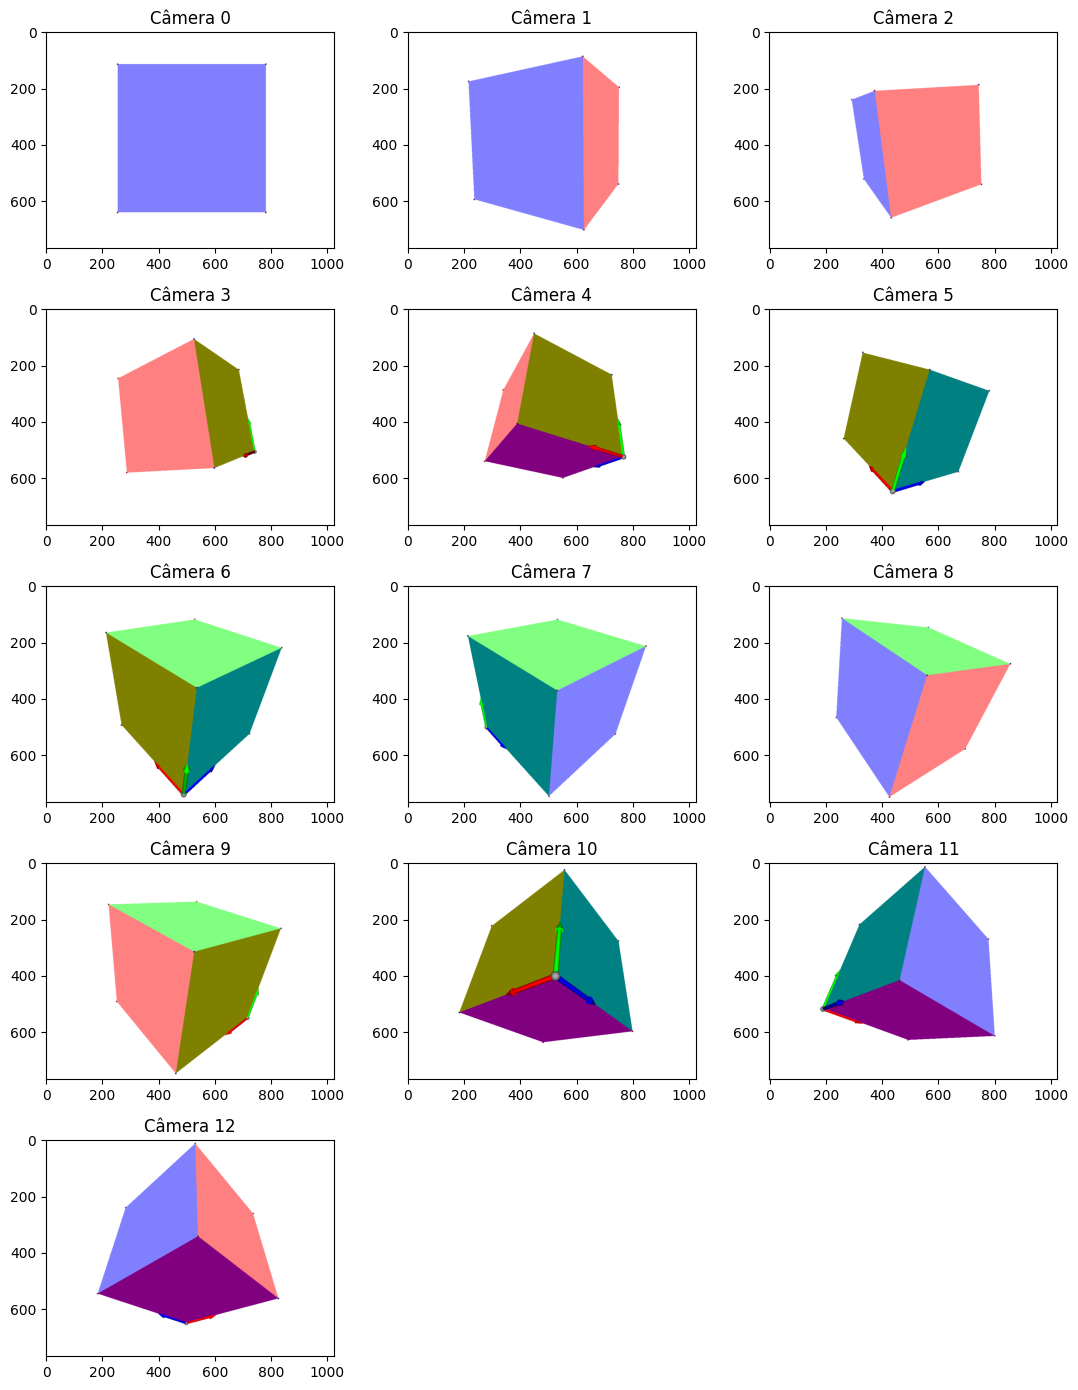

time: 1.3 s (started: 2025-05-17 23:46:21 -03:00)


In [409]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img = []
for i in range(1,14):
    img.append(mpimg.imread(f'aux_data/CuboCaptrue{i}.png'))

# Create a figure and a set of subplots
fig, axes = plt.subplots(5, 3, figsize=(11, 14))

# Display images
c = 0
for i in range(0,5): # linha
    for k in range(0,3): # #coluna
        if c>12: 
            axes[i][k].set_visible(False)
        else:
            axes[i][k].imshow(img[c])
            axes[i][k].set_title(f'Câmera {c}')
        c+=1

# Adjust layout
plt.tight_layout()
plt.show()

#### Supondo conhecida a matriz intrínseca $K$ e uma estimativa inicial das matrízes extrínsecas $T_n$ para $n=0,...5$ e 04 pontos de controle, vamos utilizar o bundle adjustment para minimizar o erro de reprojeção $\sum || \mathbf{u^{predito}_{nk}} - \mathbf{u^{utilizado}_{nk}}||$ dos demais pontos fotogramétricos iterativamente.

Montagem do vetor de incógnitas $\Theta$:

In [410]:
# imports
from sympy import symbols, IndexedBase, Idx, Matrix, diff, cos, sin, nan

# Variáeis da estrutura do problema
N = 13 # qt de imagens
M = 4 # qt de pontos fotogramétricos
O = 8 # qt de pontos fotogramétricos + pontos de controle 

do_normalization = True

# P_k esperados k = 0,...,M-1
# P_k controle k = M, ..., O-1
points = [
    [0, 1, 1], # P0
    [1, 1, 1], # P1
    [1, 0, 1], # P2
    [0, 0, 1], # P3
    [1, 1, 0], # P4
    [1, 0, 0], # P5
    [0, 1, 0], # P6
    [0, 0, 0], # P7 origem
]

# Definindo as variáveis simbólicas
# variam para n=0,...,5
# pitch = IndexedBase('φ') 
# roll = IndexedBase('ω') 
# yaw = IndexedBase('κ') 
qw = IndexedBase('q_w') 
qx = IndexedBase('q_x') 
qy = IndexedBase('q_y') 
qz = IndexedBase('q_z') 
t_x = IndexedBase('t_x')
t_y = IndexedBase('t_y')   
t_z = IndexedBase('t_z')
# variam para k=0,...,7
X = IndexedBase('X')
Y = IndexedBase('Y')
Z = IndexedBase('Z')

# parâmetros de K conhecidos
f_x = 665.1075101064489
f_y = -665.1075101064489
c_x = 511.5
c_y = 383.5

Theta = Matrix([])
for n in range(0,N):
    aux = Matrix([[qw[n]],
                  [qx[n]],
                  [qy[n]],
                  [qz[n]],
                  [t_x[n]],
                  [t_y[n]],
                  [t_z[n]]])
    Theta =Theta.col_join(aux)
for k in range(0,M):
    aux = Matrix([[X[k]],
                  [Y[k]],
                  [Z[k]]])
    Theta = Theta.col_join(aux)

Theta.T

Matrix([[q_w[0], q_x[0], q_y[0], q_z[0], t_x[0], t_y[0], t_z[0], q_w[1], q_x[1], q_y[1], q_z[1], t_x[1], t_y[1], t_z[1], q_w[2], q_x[2], q_y[2], q_z[2], t_x[2], t_y[2], t_z[2], q_w[3], q_x[3], q_y[3], q_z[3], t_x[3], t_y[3], t_z[3], q_w[4], q_x[4], q_y[4], q_z[4], t_x[4], t_y[4], t_z[4], q_w[5], q_x[5], q_y[5], q_z[5], t_x[5], t_y[5], t_z[5], q_w[6], q_x[6], q_y[6], q_z[6], t_x[6], t_y[6], t_z[6], q_w[7], q_x[7], q_y[7], q_z[7], t_x[7], t_y[7], t_z[7], q_w[8], q_x[8], q_y[8], q_z[8], t_x[8], t_y[8], t_z[8], q_w[9], q_x[9], q_y[9], q_z[9], t_x[9], t_y[9], t_z[9], q_w[10], q_x[10], q_y[10], q_z[10], t_x[10], t_y[10], t_z[10], q_w[11], q_x[11], q_y[11], q_z[11], t_x[11], t_y[11], t_z[11], q_w[12], q_x[12], q_y[12], q_z[12], t_x[12], t_y[12], t_z[12], X[0], Y[0], Z[0], X[1], Y[1], Z[1], X[2], Y[2], Z[2], X[3], Y[3], Z[3]]])

time: 0 ns (started: 2025-05-17 23:46:23 -03:00)


As coordenadas dos pixels correspondentes $\mathbf{u_{nk}}$ para $n=0,...,12$ e $k=0,...,7$

In [411]:
import numpy as np

u_nk = np.zeros((N,O,2))
qui_nk = np.zeros((N,O), dtype=int)

# Para a câmera 0: 
P_visados = [0, 1, 2, 3]
qui_nk[0, P_visados] = 1
u_nk[0,0] = [255,144]
u_nk[0,1] = [781,114]
u_nk[0,2] = [781,640]
u_nk[0,3] = [255,640]

# Para a câmera 1:
P_visados = [0, 1, 2, 3, 4, 5]
qui_nk[1, P_visados] = 1
u_nk[1,0] = [215,176]
u_nk[1,1] = [620,86]
u_nk[1,2] = [625,703]
u_nk[1,3] = [235,595]
u_nk[1,4] = [749,196]
u_nk[1,5] = [748,540]

# Para a câmera 2: 
P_visados = [0, 1, 2, 3, 4, 5]
qui_nk[2, P_visados] = 1
u_nk[2,0] = [294,240]
u_nk[2,1] = [375,208]
u_nk[2,2] = [434,660]
u_nk[2,3] = [337,522]
u_nk[2,4] = [745,187]
u_nk[2,5] = [755,541]

# Para a câmera 3: 
P_visados = [1, 2, 4, 5, 6, 7]
qui_nk[3, P_visados] = 1
u_nk[3,1] = [256,246]
u_nk[3,2] = [287,581]
u_nk[3,4] = [526,106]
u_nk[3,5] = [598,565]
u_nk[3,6] = [685,215]
u_nk[3,7] = [743,508]

# Para a câmera 4: 
P_visados = [1, 2, 4, 5, 6, 7, 3]
qui_nk[4, P_visados] = 1
u_nk[4,1] = [338,287]
u_nk[4,2] = [272,541]
u_nk[4,4] = [448,86]
u_nk[4,5] = [388,407]
u_nk[4,6] = [724,233]
u_nk[4,7] = [767,525]
u_nk[4,3] = [550,600]

# Para a câmera 5:
P_visados = [4, 5, 6, 7, 0, 3]
qui_nk[5, P_visados] = 1
u_nk[5,4] = [333,154]
u_nk[5,5] = [265,460]
u_nk[5,6] = [571,215]
u_nk[5,7] = [440,649]
u_nk[5,0] = [783,290]
u_nk[5,3] = [673,578]

# Para a câmera 6:
P_visados = [4, 1, 0, 3, 7, 5, 6]
qui_nk[6, P_visados] = 1
u_nk[6,4] = [213,165]
u_nk[6,1] = [528,118]
u_nk[6,0] = [838,219]
u_nk[6,3] = [723,525]
u_nk[6,7] = [489,744]
u_nk[6,5] = [268,494]
u_nk[6,6] = [536,361]

# Para a câmera 7:
P_visados = [6, 4, 1, 2, 3, 7, 0]
qui_nk[7, P_visados] = 1
u_nk[7,6] = [212,177]
u_nk[7,4] = [531,119]
u_nk[7,1] = [846,213]
u_nk[7,2] = [737,526]
u_nk[7,3] = [501,747]
u_nk[7,7] = [278,502]
u_nk[7,0] = [530,371]

# Para a câmera 8:
P_visados = [0, 6, 4, 5, 2, 3, 1]
qui_nk[8, P_visados] = 1
u_nk[8,0] = [259,114]
u_nk[8,6] = [566,147]
u_nk[8,4] = [858,276]
u_nk[8,5] = [697,579]
u_nk[8,2] = [428,750]
u_nk[8,3] = [239,467]
u_nk[8,1] = [562,317]

# Para a câmera 9:
P_visados = [1, 0, 6, 7, 5, 2, 4]
qui_nk[9, P_visados] = 1
u_nk[9,1] = [222,147]
u_nk[9,0] = [535,137]
u_nk[9,6] = [835,232]
u_nk[9,7] = [717,552]
u_nk[9,5] = [461,748]
u_nk[9,2] = [251,492]
u_nk[9,4] = [526,315]

# Para a câmera 10:
P_visados = [5, 4, 6, 0, 3, 2, 7]
qui_nk[10, P_visados] = 1
u_nk[10,5] = [182,531]
u_nk[10,4] = [297,223]
u_nk[10,6] = [556,24]
u_nk[10,0] = [748,277]
u_nk[10,3] = [798,598]
u_nk[10,2] = [480,637]
u_nk[10,7] = [524,402]

# Para a câmera 11:
P_visados = [7, 6, 0, 1, 2, 5, 3]
qui_nk[11, P_visados] = 1
u_nk[11,7] = [190,520]
u_nk[11,6] = [321,218]
u_nk[11,0] = [554,13]
u_nk[11,1] = [780,270]
u_nk[11,2] = [802,614]
u_nk[11,5] = [494,628]
u_nk[11,3] = [464,416]

# Para a câmera 12:
P_visados = [3, 0, 1, 4, 5, 7, 2]
qui_nk[12, P_visados] = 1
u_nk[12,3] = [183,546]
u_nk[12,0] = [283,240]
u_nk[12,1] = [530,12]
u_nk[12,4] = [736,261]
u_nk[12,5] = [826,563]
u_nk[12,7] = [498,653]
u_nk[12,2] = [540,342]

uv_nk = u_nk.reshape((2*N*O,1))

u_nk.shape, qui_nk.shape, uv_nk.shape

((13, 8, 2), (13, 8), (208, 1))

time: 15 ms (started: 2025-05-17 23:46:23 -03:00)


Montagem da matriz de derivadas parciais $A$:

In [412]:
F = []
A = []
for n in range(0,N):
    for k in range(0,O):
        # Euler
        # P_11 = f_x*cos(yaw[n])*cos(pitch[n]) - c_x*sin(pitch[n])
        # P_12 = f_x*(cos(yaw[n])*sin(pitch[n])*sin(roll[n]) - sin(yaw[n])*cos(roll[n])) + c_x*cos(pitch[n])*sin(roll[n])
        # P_13 = f_x*(cos(yaw[n])*sin(pitch[n])*cos(roll[n]) + sin(yaw[n])*sin(roll[n])) + c_x*cos(pitch[n])*cos(roll[n])
        # P_14 = c_x*t_z[n] + f_x*t_x[n]
        # P_21 = -f_y*sin(yaw[n])*sin(roll[n]) - c_y*sin(pitch[n])
        # P_22 = c_y*sin(roll[n])*cos(pitch[n]) - f_y*(sin(yaw[n])*sin(pitch[n])*sin(roll[n]) + cos(yaw[n])*cos(roll[n]))
        # P_23 = c_y*cos(roll[n])*cos(pitch[n]) - f_y*(sin(yaw[n])*sin(pitch[n])*cos(roll[n]) - cos(yaw[n])*sin(roll[n]))
        # P_24 = c_y*t_z[n] - f_y*t_y[n]
        # P_31 = -sin(pitch[n])
        # P_32 = cos(pitch[n])*sin(roll[n])
        # P_33 = cos(pitch[n])*cos(roll[n])
        # P_34 = t_z[n]

        # Quatérnios
        P_11 = c_x*(2*qw[n]*qy[n] + 2*qx[n]*qz[n]) + f_x*(-2*qy[n]**2 - 2*qz[n]**2 + 1)
        P_12 = c_x*(-2*qw[n]*qx[n] + 2*qy[n]*qz[n]) + f_x*(2*qw[n]*qz[n] + 2*qx[n]*qy[n])
        P_13 = c_x*(-2*qx[n]**2 - 2*qy[n]**2 + 1) + f_x*(-2*qw[n]*qy[n] + 2*qx[n]*qz[n])
        P_14 = c_x*t_z[n] + f_x*t_x[n]
        P_21 = c_y*(2*qw[n]*qy[n] + 2*qx[n]*qz[n]) + f_y*(-2*qw[n]*qz[n] + 2*qx[n]*qy[n])
        P_22 = c_y*(-2*qw[n]*qx[n] + 2*qy[n]*qz[n]) + f_y*(-2*qx[n]**2 - 2*qz[n]**2 + 1)
        P_23 = c_y*(-2*qx[n]**2 - 2*qy[n]**2 + 1) + f_y*(2*qw[n]*qx[n] + 2*qy[n]*qz[n])
        P_24 = c_y*t_z[n] + f_y*t_y[n]
        P_31 = 2*qw[n]*qy[n] + 2*qx[n]*qz[n]
        P_32 = -2*qw[n]*qx[n] + 2*qy[n]*qz[n]
        P_33 = -2*qx[n]**2 - 2*qy[n]**2 + 1
        P_34 = t_z[n]
        
        if k>=M: # pontos de controle (conhecidos)
            x, y, z = points[k]
        else:  # pontos fotogramétricos (precisam ajustamento)
            x, y, z = X[k], Y[k], Z[k]
        
        u = qui_nk[n,k]*(P_11*x + P_12*y  + P_13*z  + P_14)/(P_31*x  + P_32*y  + P_33*z  + P_34)
        v = qui_nk[n,k]*(P_21*x + P_22*y  + P_23*z  + P_24)/(P_31*x  + P_32*y  + P_33*z  + P_34)
        
        # Normalização?
        if do_normalization:
            if qui_nk[n,k]:
                u = (u - c_x) / f_x
                v = (v - c_y) / f_y
        
        if len(F) == 0:
            F = Matrix([[u],
                        [v]])
            A = Matrix([diff(u, Theta).T,
                        diff(v, Theta).T])
        else: 
            aux = Matrix([[u],
                          [v]])
            F = F.col_join(aux)

            aux2 = Matrix([diff(u, Theta).T,
                           diff(v, Theta).T])
            A = A.col_join(aux2)

print("F.shape", F.shape, f" / Esperado (2ON x 1) = {2*O*N} x {1}")
print("A.shape", A.shape, f" / Esperado (2ON x Qt de variáveis) = {2*O*N} x {Theta.shape[0]}")

F.shape (208, 1)  / Esperado (2ON x 1) = 208 x 1
A.shape (208, 103)  / Esperado (2ON x Qt de variáveis) = 208 x 103
time: 31.5 s (started: 2025-05-17 23:46:23 -03:00)


In [413]:
# sneak look on F:
# F

time: 0 ns (started: 2025-05-17 23:46:54 -03:00)


Mascaramento de observações ausentes $\rightarrow$ Remoção das linhas nulas de $L_b, F$ e $A$ que não contribuem para a solução.

In [414]:
def delete_all_zero_rows(matrix):
    if isinstance(matrix, np.ndarray):
        # Boolean array: [True, False, True]
        rows_with_all_zeros = np.all(matrix == 0, axis=1) 
        # Indices of rows with all zeros: [0, 2]
        idx_rows_with_all_zeros = np.where(rows_with_all_zeros)[0]
        new_arr = np.delete(matrix, idx_rows_with_all_zeros, axis=0)
        print("Matrix in/out shape:", matrix.shape , "/", new_arr.shape )
        print("índices removidos:", idx_rows_with_all_zeros)
    elif isinstance(matrix, Matrix):
        A = np.array(matrix)
        return delete_all_zero_rows(A)
    else:
        new_arr = matrix
    return new_arr

uv_nk = delete_all_zero_rows(uv_nk)
F_sympy = Matrix(delete_all_zero_rows(F))
A_sympy = Matrix(delete_all_zero_rows(A))

Matrix in/out shape: (208, 1) / (168, 1)
índices removidos: [  8   9  10  11  12  13  14  15  28  29  30  31  44  45  46  47  48  49
  54  55  64  65  82  83  84  85 100 101 122 123 142 143 150 151 162 163
 184 185 204 205]
Matrix in/out shape: (208, 1) / (168, 1)
índices removidos: [  8   9  10  11  12  13  14  15  28  29  30  31  44  45  46  47  48  49
  54  55  64  65  82  83  84  85 100 101 122 123 142 143 150 151 162 163
 184 185 204 205]
Matrix in/out shape: (208, 103) / (168, 103)
índices removidos: [  8   9  10  11  12  13  14  15  28  29  30  31  44  45  46  47  48  49
  54  55  64  65  82  83  84  85 100 101 122 123 142 143 150 151 162 163
 184 185 204 205]
time: 32 ms (started: 2025-05-17 23:46:54 -03:00)


Normalização das coordenadas do  pixel

In [415]:
uv_nk_norm = uv_nk.copy()
for i in range(0,len(uv_nk),2):
    u = uv_nk[i]
    v = uv_nk[i+1]
    uv_nk_norm[i] = (u - c_x)/f_x
    uv_nk_norm[i+1] = (v - c_y)/f_y
print(uv_nk_norm.T, uv_nk_norm.shape)

[[-0.38565194  0.36009216  0.40519765  0.40519765  0.40519765 -0.38565194
  -0.38565194 -0.38565194 -0.44579259  0.31197964  0.16313152  0.44729611
   0.1706491  -0.48037347 -0.41572226 -0.3179937   0.35708513  0.28190931
   0.35558161 -0.23530031 -0.3270148   0.21575459 -0.20522998  0.26386712
  -0.11652252 -0.41572226 -0.2623636  -0.20823701  0.35107106  0.29544096
   0.36610623 -0.23680382 -0.38414842  0.20673349 -0.33753942 -0.29694447
   0.02180099  0.41722578  0.13005416 -0.27288821  0.26086008  0.2533425
   0.34806403 -0.18718778 -0.26086008  0.14508933 -0.36009216 -0.23680382
   0.05788538 -0.32551128 -0.09547329  0.44729611 -0.18568427 -0.03533263
   0.31949722  0.22627921  0.38414842 -0.21274756  0.40820468  0.14057878
   0.24281789 -0.29243393 -0.26837766  0.345057   -0.37061677 -0.115019
   0.08945922  0.2533425  -0.10750142 -0.39918358  0.49089808  0.24732844
   0.02480802  0.39918358  0.3179937  -0.21274756 -0.44879962  0.32851832
  -0.36610623 -0.16613855  0.03683615  0.

Preparo da estimativa inicial

In [ ]:
import json
import numpy as np
from scipy.spatial.transform import Rotation

# Load the jsons
cameras = []
for i in range(1,N+1):
    cameras.append(json.load(open(f"aux_data/CuboCamera{i}.json")))

# get euler and CRS translation 
T_esperado = []
quat = []
t = []
for i in range(N):
    T = np.array(cameras[i]['extrinsic'], dtype=float).reshape(4,4).T
    r = Rotation.from_matrix(T[:3,:3])
    t.append( T[:3,3] )
    quat.append(r.as_quat(scalar_first=True))
    T_esperado.append( [ *quat[-1], *t[-1]] )


# show expected angles and translation
for i in range(N):
    print(f"qw qx qy qz tx ty tz [{i}], :\n", quat[i], t[i])
print()

# Montagem da estimativa inicial
chute = {}
ruido = 0.2 # 20%
for i in range(N):
    chute.update({  qw[i]: float(quat[i][0])*(1+ruido), 
                    qx[i]: float(quat[i][1])*(1+ruido), 
                    qy[i]: float(quat[i][2])*(1+ruido), 
                    qz[i]: float(quat[i][3])*(1+ruido), 
                    t_x[i]: float(t[i][0])*(1+ruido), 
                    t_y[i]: float(t[i][1])*(1+ruido),  
                    t_z[i]: float(t[i][2])*(1+ruido) })
# Inicializar pontos fotogramétricos (P_k com k=0,...,M-1)
for k in range(M):
    chute.update({ X[k]: points[k][0]*(1+ruido), 
                   Y[k]: points[k][1]*(1+ruido), 
                   Z[k]: points[k][2]*(1+ruido) })
print("Estimativa inicial: \n", chute)


qw qx qy qz tx ty tz [0], :
 [0. 1. 0. 0.] [-0.488       0.488       2.26162003]
qw qx qy qz tx ty tz [1], :
 [-3.68641330e-02  9.63873056e-01  3.17915739e-04 -2.63798534e-01] [-0.16271085  0.44228545  2.47529001]
qw qx qy qz tx ty tz [2], :
 [-0.10613064  0.84549     0.0101652  -0.52323955] [0.25794975 0.33193084 2.82616274]
qw qx qy qz tx ty tz [3], :
 [ 0.03055623 -0.46363518  0.09572973  0.88030935] [0.74235398 0.3991334  2.15639406]
qw qx qy qz tx ty tz [4], :
 [-0.09982132 -0.23621909  0.25794657  0.93150406] [0.63242048 0.35205936 1.65637358]
qw qx qy qz tx ty tz [5], :
 [-0.17442653  0.38008776 -0.04582516  0.90719829] [-0.16447676  0.6035658   1.52446358]
qw qx qy qz tx ty tz [6], :
 [-0.15167028  0.35960785 -0.25744034  0.8839699 ] [-0.04952677  0.79094827  1.47971539]
qw qx qy qz tx ty tz [7], :
 [-0.28608053  0.88300047 -0.08905193  0.36130022] [-0.71322591  0.3628639   2.04577916]
qw qx qy qz tx ty tz [8], :
 [-0.17998399  0.88460087  0.21222816 -0.37422756] [-0.06447017  

Inicializações

In [417]:
# Inicializações

# Loteamento
# de preferência divisor de A.shape[0] = 168 e 
# não menor que 4 + 6N + 3M = A.shape[1] = 90
batch_size = A_sympy.shape[0] # apenas 1 Lote 

# set Theta_0 = X_0: 
X_0 = chute
print("X_0:\n", X_0)

# mount Lb
if do_normalization:
    Lb = uv_nk_norm
else: 
    Lb = uv_nk
print(f"Lb:\n", Lb.T)

# mount batches
def get_batches(Matrix,batch_size):

    batches = []
    for i in range(0, int(np.ceil(Matrix.shape[0]/batch_size))):
        Matrix_i = Matrix[i*batch_size: (i+1)*batch_size ,:]
        batches.append(Matrix_i)
    return np.array(batches)

Lb_batches = get_batches(Lb, batch_size)
F_sympy_batches = get_batches(F_sympy, batch_size)
A_sympy_batches = get_batches(A_sympy, batch_size)

print("Batches shape: \n", Lb_batches.shape, F_sympy_batches.shape, A_sympy_batches.shape)

X_0:
 {q_w[0]: 0.0, q_x[0]: 1.2, q_y[0]: 0.0, q_z[0]: 0.0, t_x[0]: -0.5856, t_y[0]: 0.5856, t_z[0]: 2.7139440323406365, q_w[1]: -0.04423695965997835, q_x[1]: 1.1566476670676153, q_y[1]: 0.00038149888716210986, q_z[1]: -0.3165582412853656, t_x[1]: -0.19525302311648876, t_y[1]: 0.5307425392356674, t_z[1]: 2.970348007396306, q_w[2]: -0.12735676659154976, q_x[2]: 1.0145879944299754, q_y[2]: 0.012198236666922466, q_z[2]: -0.6278874569412288, t_x[2]: 0.3095396940390452, t_y[2]: 0.3983170107880321, t_z[2]: 3.3913952843910824, q_w[3]: 0.03666747341496014, q_x[3]: -0.5563622177256131, q_y[3]: 0.11487567934747063, q_z[3]: 1.0563712213872818, t_x[3]: 0.8908247768958545, t_y[3]: 0.4789600767027058, t_z[3]: 2.5876728680651415, q_w[4]: -0.11978558259823881, q_x[4]: -0.2834629128571977, q_y[4]: 0.3095358889818977, q_z[4]: 1.117804868780012, t_x[4]: 0.758904570069654, t_y[4]: 0.4224712349027275, t_z[4]: 1.9876482976028782, q_w[5]: -0.20931183057117583, q_x[5]: 0.45610531506185736, q_y[5]: -0.054990190

Converter as expressões simbólicas do SymPy (F e A) para funções Python 

In [418]:
from sympy import lambdify

# Lista de variáveis que compõem Theta
theta_vars = list(Theta)

# Criando funções lambda para F e A
F_func_batches = []
A_func_batches = []
for i in range(0,len(Lb_batches)):
    F_func_batches.append( lambdify(theta_vars, F_sympy_batches[i], modules='numpy') )
    A_func_batches.append( lambdify(theta_vars, A_sympy_batches[i], modules='numpy') )

time: 26.1 s (started: 2025-05-17 23:46:54 -03:00)


In [419]:
# Antes (usando sympy para atribuir valores e fazer os cálculos)
F_val = np.array(Matrix(F_sympy_batches[0]).subs(X_0).evalf().tolist(), dtype=float)
F_val[:5], F_val.shape

(array([[-1.27875888],
        [-3.64760731],
        [ 1.34164867],
        [-3.64760731],
        [ 1.34164867]]),
 (168, 1))

time: 17 s (started: 2025-05-17 23:47:21 -03:00)


In [420]:
# Depois (usando função python para atribuir valores e fazer os cálculos)
F_val2 = F_func_batches[0](*X_0.values())
F_val2[:5], F_val2.shape, np.allclose(F_val2,F_val)

(array([[-1.27875888],
        [-3.64760731],
        [ 1.34164867],
        [-3.64760731],
        [ 1.34164867]]),
 (168, 1),
 True)

time: 15 ms (started: 2025-05-17 23:47:38 -03:00)


In [421]:
# Antes (usando sympy para atribuir valores e fazer os cálculos)
A_val = np.array(Matrix(A_sympy_batches[0]).subs(X_0).evalf().tolist(), dtype=float)
A_val[:5,:5], A_val.shape

(array([[ -8.04208665, -16.08417329,   6.28897812,   6.28897812,
           2.18367296],
        [-16.65074445, -58.45740138,   0.        ,   0.        ,
           0.        ],
        [  8.43759911,  16.87519821,   6.28897812,  -2.14862098,
           2.18367296],
        [-16.65074445, -58.45740138,   6.28897812,  22.93972257,
           0.        ],
        [  0.        ,  16.87519821,   0.        ,  -2.14862098,
           2.18367296]]),
 (168, 103))

time: 2min 26s (started: 2025-05-17 23:47:38 -03:00)


In [422]:
# Depois (usando função python para atribuir valores e fazer os cálculos)
A_val2 = A_func_batches[0](*X_0.values())
A_val2[:5,:5], A_val2.shape, np.allclose(A_val2,A_val)

(array([[ -8.04208665, -16.08417329,   6.28897812,   6.28897812,
           2.18367296],
        [-16.65074445, -58.45740138,  -0.        ,   0.        ,
           0.        ],
        [  8.43759911,  16.87519821,   6.28897812,  -2.14862098,
           2.18367296],
        [-16.65074445, -58.45740138,   6.28897812,  22.93972257,
           0.        ],
        [  0.        ,  16.87519821,   0.        ,  -2.14862098,
           2.18367296]]),
 (168, 103),
 True)

time: 0 ns (started: 2025-05-17 23:50:04 -03:00)


Ajustamento

In [423]:
# Ajustamento
lambda_lm = 5e3  # valor inicial de damping - alto preza pela estabilidade, baixo pela rapidez
points_esperado = np.array(points[0:4])
T_esperado = np.array(T_esperado)
erros_cor = [] # guardar cada Xcorreção
erros_pontos = [] # guardar cada erro entre os pontos esperados e os preditos
erros_T = [] # guardar o erro dos parâmetros extrínsecos esp e pred
erro_cor = 10000000
cont = 0
while erro_cor>10e-6 and cont<200:
    erro_cor = 0
    for i in range(0,len(Lb_batches)):
        F = F_func_batches[i]
        A = A_func_batches[i]
        Lb = Lb_batches[i]

        # update L0 = F(X0)
        L0 = F(*X_0.values())
        
        # update L
        L = L0 - Lb

        # update A
        a = A(*X_0.values())

        # Levenberg-Marquardt update:
        sym = a.T @ a + lambda_lm * np.eye(a.shape[1])
        
        # update X = vetor das correções
        Xcor = - np.linalg.inv(sym) @ a.T @ L
        
        # update erro de correção
        batch_error = np.linalg.norm(Xcor)
        erro_cor += batch_error
        
        # update lista X0 = pretendente a Xa
        X0 = Xcor + np.array(list(X_0.values())).reshape((Xcor.shape[0],1))

        # Atualiza dicionário X_0 com novos valores
        for i in range(Theta.shape[0]):
            X_0.update({Theta[i]: X0[i].item()})
        print("\nXa:\n", X_0)

        # Captura dos pontos preditos e compara com o esperado
        points_preditos = []
        for k in range(M):
            P_calc = np.array([X_0[X[k]], X_0[Y[k]], X_0[Z[k]]])
            P_esperado = points[k]
            print(f"P{k}:", P_calc, "\t--> Erro:", np.linalg.norm(P_esperado-P_calc))
            points_preditos.append(P_calc)
        erros_pontos.append(np.linalg.norm(points_esperado-points_preditos))
        
        # Captura params extrinsecos preditos e compara com o esperado
        T_preditos = []
        for n in range(N):
            T_calc = np.array([ X_0[qw[n]], X_0[qx[n]] , X_0[qy[n]], X_0[qz[n]],
                                X_0[t_x[n]], X_0[t_y[n]], X_0[t_z[n]]])
            T_preditos.append(T_calc)
        erros_T.append(np.linalg.norm(T_esperado-T_preditos))
    
    # update fator de amortecimento
    if cont>0 and erro_cor < erros_cor[-1]:  # Se o erro diminuiu
        lambda_lm *= 0.8  # Diminui lambda (mais Gauss-Newton)
    else:
        lambda_lm *= 2.0  # Aumenta lambda (mais damping)
    
    # save errors to graph
    erros_cor.append(erro_cor)
    print(f"Iteração {cont+1}: Norma correção = {erro_cor:.5f}, Erro pontos = {erros_pontos[-1]:.6f}, Erro T = {erros_T[-1]:.6f}, lambda = {lambda_lm:.3f},")
    cont += 1


Xa:
 {q_w[0]: -0.011127825606938044, q_x[0]: 1.1619621274643954, q_y[0]: 0.00033507990415716457, q_z[0]: 0.0071620605756728285, t_x[0]: -0.5856905347996417, t_y[0]: 0.5859241486474785, t_z[0]: 2.7194300131372855, q_w[1]: -0.05486939888148691, q_x[1]: 1.139289443368973, q_y[1]: -0.0015194364020647351, q_z[1]: -0.3124223938111307, t_x[1]: -0.19547865614305499, t_y[1]: 0.5320827950841401, t_z[1]: 2.9725469464520473, q_w[2]: -0.12925536551244315, q_x[2]: 0.9975465131863724, q_y[2]: 0.009892430038315237, q_z[2]: -0.6180177718822635, t_x[2]: 0.3100545869239624, t_y[2]: 0.39884937761874273, t_z[2]: 3.393564609750396, q_w[3]: 0.03705804896042658, q_x[3]: -0.5530065758884172, q_y[3]: 0.11520714352306757, q_z[3]: 1.0528918824507343, t_x[3]: 0.8910859818535002, t_y[3]: 0.4791101585906154, t_z[3]: 2.5882147960422417, q_w[4]: -0.11898184393636649, q_x[4]: -0.28150497021626086, q_y[4]: 0.3088056206113962, q_z[4]: 1.1153017824403118, t_x[4]: 0.7591857686400282, t_y[4]: 0.4223890806417032, t_z[4]: 1.

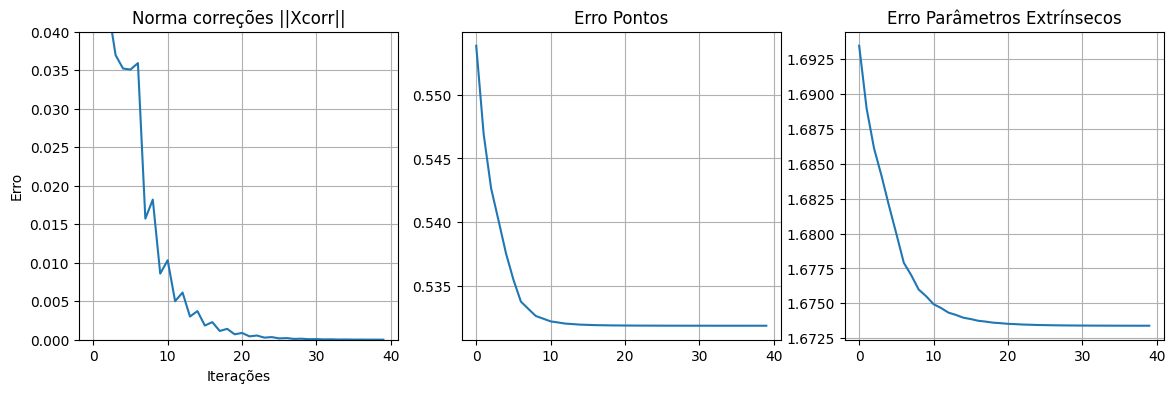

time: 765 ms (started: 2025-05-17 23:50:04 -03:00)


In [424]:
# Gráficos
fig, axs = plt.subplots(1, 3, figsize=(14,4))

axs[0].set_title("Norma correções ||Xcorr||")
axs[0].set_xlabel("Iterações")
axs[0].set_ylabel("Erro")
[axs[i].grid() for i in range(3)]
# Limit y-axis
axs[0].set_ylim(0, 0.04)
axs[0].plot(erros_cor)

axs[1].set_title(f"Erro Pontos")
axs[1].plot(erros_pontos)

axs[2].set_title(f"Erro Parâmetros Extrínsecos")
axs[2].plot(erros_T)
plt.show()

### (v) Relembrando recomendações para o voo fotogramétrico

<b>Recomendações:</b>

- Bundle adjustment é altamente sensível a estimativas iniciais longe do esperado;
- Planejar a escala da foto, altura do voo, superposição longitudinal e lateral, tolerância da atitude, números de faixas, números de fotos por faixa, etc;
- Espaçamento planimétrico dos GCP - H. M. Karara (extraídas de T34-304, 1984): $n = 0,047 \sqrt{\frac{25000d_{carta}}{d_{foto}}}$ , onde:
    - $d_{carta}$ é denominador da escala da carta; e
    - $d_{foto}$ é denominador da escala da foto;
- Espaçamento planimétrico das bases - Andrade (1998): $B = T_{foto}d_{foto}\left (\frac{100-R_{long}}{100} \right )$, onde:
    - O termo <i>base</i> ($B$) é considerado o valor da distância, no sistema do espaço-objeto, entre os centros de perspectiva de duas exposições sucessivas, ao longo da mesma faixa de vôo, ou seja, a distânica longitudinal entre duas fotografias sucessivas;
    - $T_{foto}$ é o tamanho da foto no sentido longitudinal;
    - $R_{long}$ é a porcentagem do recobrimento longitudinal desejada, recomenda-se 60%;
- Espaçamento entre faixas: $D = T_{foto}d_{foto}\left (\frac{100-R_{lateral}}{100} \right )$, onde:
    - $R_{lateral}$ é a porcentagem do recobrimento lateral desejada, recomenda-se 30%;
- Área útil: $A_{útil} = BD$;
- Número de fotos total: $N_{fotos} = A_{total}/A_{útil}$ ;
- GCP sinalizados em superfícies de altura constante (lagos, terraços do mesmo prédio), podem agilizar o campo.
- Vôo apoiado por GPS: 
    - Utilizar-se do <u>modo cinemático, podendo ser pós processado,</u> para o conhecimento dos parâmetros de orientação exterior para cada tomada da foto (com precisão posicional centimétrica);
    - Caso seja usado o <u>modo RTK (Real Time Kinematic– método de posicionamento relativo cinemático em tempo real),</u> pode-se até mesmo  realizar-se o restante da aerotriangulação em tempo real (on-the-fly). É muito empregado em sistemas automáticos de fotogrametria. Ver [matrice-350-rtk](https://enterprise.dji.com/pt-br/matrice-350-rtk); 
    - Nestes casos, dispensa-se o conhecimento de coordenadas de quaisquer pontos de campo.

### Exemplo 3

Busca-se realizar um voo fotogramétrico sobre uma área na forma retangular de aprox 45.000.000 $\mathbf{m^2}$. O recobrimento lateral e longitudinal definidos são 30% e 40%. Pela altura do voo de H metros e pelo Campo de visão da câmera, estima-se que cada foto recubra uma área de 1000x750 m em imagens de 4864x3648 px. Qual o número de fotos total estimado?

- Avanço longitudinal por foto: $750 \times (1 - 0,4) = \mathbf{450 m}$;
- Avanço lateral da faixa foto: $1000 \times (1 - 0,3) = \mathbf{700 m}$;
- Área Útil: $450 \times 700 = \mathbf{315000 m^2}$;
- Nr de fotos estimado: $\frac{45000000}{315000} = \mathbf{142.8}$ fotos.

Sabendo que a forma deste terreno é 9847x4743 m e pretende-se uma carta na escala 1:25.000, quantos pontos de controle devem ser espalhados pelo terreno?

- Espaçamento GCP: $0,047 \sqrt{25000 \times 25000} = \mathbf{1175 m}$;
- Nr GCP ao longo da faixa longitudinal: $\frac{9847}{1175} = \mathbf{8,38}$;
- Nr GCP ao longo da lateral: $\frac{4743}{1175} = \mathbf{4,03}$;
- Nr GCP aproximado: $ 8,38 \times 4,03 = 33,77 \approx \mathbf{34}$.

Sabendo que pretende-se adquirir ao menos 3 pontos fotogramétricos por ligação entre fotos, qual o tamanho da matriz das derivadas parciais $A$?

- Qt de pontos fotogramétricos;
    - Esses pontos visam amarrar as imagens então são sempre compartilhados entre as fotos;
    - Fotos na direção longitudinal: $\frac{9847}{450} = 21,08 \approx 22$ fotos;
    - Fotos na direção lateral: $\frac{4743}{700} = 6,77 \approx 7$ fotos;
    - Atualização da quantidade de imagens: $N = 22\times7 = \mathbf{154}$;
    - Qt de ligações na direção longitudinal $21\times 7 = 147$;
    - Qt de ligações na direção lateral $22\times 6 = 132$;
    - Total de pontos fotogramétricos: $M = 3 \times (147+132) = 837$;
- Total de pontos do espaço objeto: $O = 837 + 34 = 871$
- $A$ seria do formato $(2NO \times 4+6N+3M) = ( 2\cdot 154 \cdot 871 \times 4+6 \cdot 154+3 \cdot 837)  = ( 268.268 \times 3.439)$ .

## Prática

Download dos dados

In [3]:
import gdown
import zipfile
import os

# Caminho onde o arquivo será salvo
output = 'aux_data/imgs_drone.zip'

if not os.path.isfile(output):
    # URL do arquivo no Google Drive
    url = 'https://drive.google.com/uc?id=1KLeeVhj1nfYlC1fAo78YpTeYBVAhGrKP'
    # Baixar o arquivo
    gdown.download(url, output, quiet=False)

# Caminho onde os arquivos serão extraído
extract_path = 'aux_data/'

if not os.path.exists(extract_path+"FOTOS_VOO"):
    # Descompactar o arquivo ZIP
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

Downloading...
From (original): https://drive.google.com/uc?id=1KLeeVhj1nfYlC1fAo78YpTeYBVAhGrKP
From (redirected): https://drive.google.com/uc?id=1KLeeVhj1nfYlC1fAo78YpTeYBVAhGrKP&confirm=t&uuid=289e966f-0cd2-491f-969c-63a6862edaca
To: d:\SFMTools\aux_data\imgs_drone.zip
100%|██████████| 201M/201M [00:03<00:00, 54.9MB/s] 


Problema:

Realizar o ajustamento por algum dos seguintes softwares:

- https://www.agisoft.com/ (30 day trial)
- https://www.opendronemap.org/
- https://colmap.github.io/
- https://alicevision.org/#meshroom